# Prep Capstone: Data about Hair salon appointment no-shows
_by Yunjin Bak_

No shows have significant financial effect on hair salons. The financial damage not only include the customers who don't show up but also potential customers who could visit if there is no prior appointment, which makes it worse. If it is possible to understand no show customers' distinguishing behavior pattern, it would help hair salons to predict no-shows and take action to reduce it. In order to explore the characteristics that no show customers have, here I analyzed the data which have various information of no show customers and the others for hair salon. The data were obtained in 2018.

## Additional applicable fields

- Dentist, Doctor's office
- Spa, Massage shops


# Variable description

|Field Name | Description 
|:-:|:---:|
| book_tod | Booking time of day|
| book_dow | The booking day-of-week.|
|book_category|The booked service category (COLOR or STYLE)|
|book_staff|The staff member to provide the service.|
|last_category|The client's last booked service category before the current booking or today whichever is greater.|
|last_staff|The staff member who provided the client's last service before the current booking or today whichever is greater.|
|last_day_services|The number of services provided to the client on their last visit before the current booking or today whichever is greater.|
|last_receipt_tot|The amount paid by the client on their last visit before the current booking or today whichever is greater.|
|last_dow|The day-of-week of the client's last booking before before the current booking or today whichever is greater.|
|last_tod|The time-of-day of the client's last booking before the current booking or today whichever is greater.|
|last_nos|howDid the client no-show on their last booking before the current booking or today whichever is greater? (0 - no, 1 - yes)|
|last_prod_flag|Did the client buy a retail product on their last booking before the current booking or today whichever is greater? (0 - no, 1 - yes)|
|last_cumrev|The client's cumulative service revenue as of their last booking before the current booking or today whichever is greater.|
|last_cumbook|The client's cumulative number of bookings as of their last booking before the current booking or today whichever is greater.|
|last_cumstyle|The client's cumulative number of STYLE bookings as of their last booking before the current booking or today whichever is greater.|
|last_cumcolor|The client's cumulative number of COLOR bookings as of their last booking before the current booking or today whichever is greater.|
|last_cumprod|The client's cumulative number of bookings with retail product purchases as of their last booking before the current booking or today whichever is greater.|
|last_cumcancel|The client's cumulative number of appointment cancellations as of their last booking before the current booking or today whichever is greater.|
|last_cumnoshow|The client's cumulative number of no-shows as of their last booking before the current booking or today whichever is greater.|
|noshow|Did the client no-show or execute an out-of-policy cancellation for this booking? (0 - no, 1 - yes)|
|recency|The number of days since the client's last booking before the current booking or today whichever is greater.|

# Describing and exploring the data

The chance of no show is 13.0 %


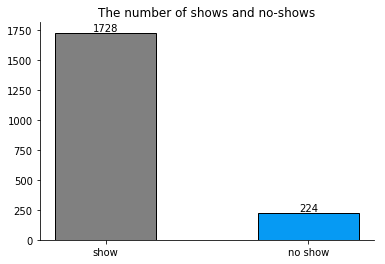

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Load data
df=pd.read_csv("hair_salon_no_show_wrangled_df.csv")

#Counting the number of Shows and No-Shows
xaxis=['show','no show']
bar=plt.bar(xaxis,df['noshow'].groupby(df['noshow']).count(),color=['gray','xkcd:azure'],edgecolor='black',width=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('The number of shows and no-shows')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom')

print('The chance of no show is %.1f' %(df[df['noshow']==1]['noshow'].count() / df[df['noshow']==0]['noshow'].count() * 100) , '%')



In [86]:
#Looking around the data
df.head()

,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,last_tod,...,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
0,afternoon,Wednesday,STYLE,JJ,NaN,NaN,0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,morning,Wednesday,COLOR,JOANNE,NaN,NaN,0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262.0,Wednesday,morning,...,1,262,2,1,1,2,0,0,0,35
3,afternoon,Thursday,STYLE,KELLY,NaN,NaN,0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Thursday,afternoon,...,0,35,1,1,0,0,0,0,0,9


In [280]:
#Describing the data
df.describe().unstack()

Unnamed: 0         count    1952.000000
                   mean      975.500000
                   std       563.638182
                   min         0.000000
                   25%       487.750000
                   50%       975.500000
                   75%      1463.250000
                   max      1951.000000
last_day_services  count    1952.000000
                   mean        0.545082
                   std         0.658514
                   min         0.000000
                   25%         0.000000
                   50%         0.000000
                   75%         1.000000
                   max         3.000000
last_receipt_tot   count    1952.000000
                   mean       35.782679
                   std        59.371877
                   min         0.000000
                   25%         0.000000
                   50%         0.000000
                   75%        60.000000
                   max       382.800000
last_noshow        count    1952.000000


In [282]:
# Drop the unnecessary column
df=df.drop(columns=['Unnamed: 0'])

In [284]:
# Comparing all numeric data between no show customers and the others
df.groupby(df['noshow']).mean()

,last_day_services,last_receipt_tot,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,recency
noshow,,,,,,,,,,,,
0,0.539931,35.289821,0.060764,0.116898,97.443866,1.728588,1.347222,0.318866,0.491319,0.238426,0.320602,14.856481
1,0.584821,39.584732,0.196429,0.093750,217.825893,3.281250,2.857143,0.375000,0.455357,0.602679,1.209821,10.897321


Text(0.5, 1.0, 'The percentage of booking for each staff member')

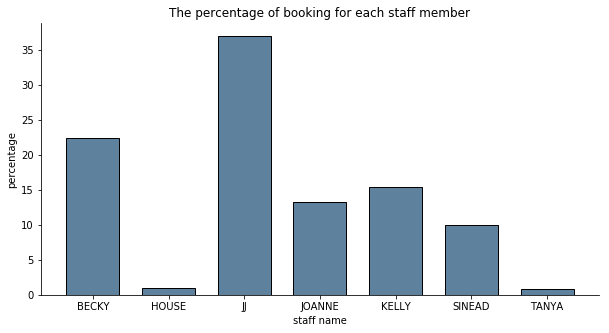

In [348]:
# The booked staff 

staff_raw=df.groupby(df['book_staff']).book_staff.count()
staff=staff_raw/staff_raw.sum()*100

N=7
ind=np.arange(N)
width=0.7

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(111)

ax.bar(staff.index, staff, width, color='xkcd:greyish blue', edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('percentage')
plt.xlabel('staff name')
plt.title('The percentage of booking for each staff member')

There is big difference in the number of bookings among the staffs. Is there also diffrence in percentage of no shows among the staffs?

book_tod
afternoon    735
evening      434
morning      548
Name: book_tod, dtype: int64

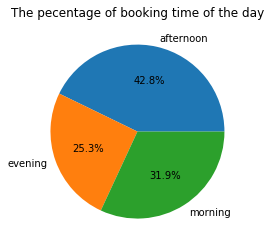

In [372]:
# The booking time of the day

plt.pie(df.groupby(['book_tod']).book_tod.count(),labels=['afternoon','evening','morning'],autopct='%.1f%%')
plt.title('The pecentage of booking time of the day')
df.groupby(['book_tod']).book_tod.count()


The bookings are made in afternoon the most. 

Text(0.5, 0, 'The day of week')

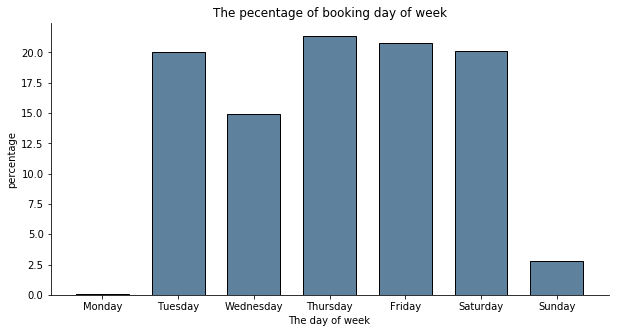

In [357]:
# The booking day of the week
dow_raw=df.groupby(['book_dow']).book_dow.count()
dow=dow_raw/sum(dow_raw)*100

newidx=['Monday','Tuesday','Wednesday', 'Thursday','Friday',  'Saturday', 'Sunday']

dow=dow.reindex(newidx)

N=7
ind=np.arange(N)
width=0.7

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(111)

ax.bar(dow.index, dow, width, color='xkcd:greyish blue', edgecolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('The pecentage of booking day of week')
plt.ylabel('percentage')
plt.xlabel('The day of week')

Thursday is the busiest day of week, and Sunday is the least busy day. What day does the hair salon have the great percentage of no shows to shows?   

/Users/yunjin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


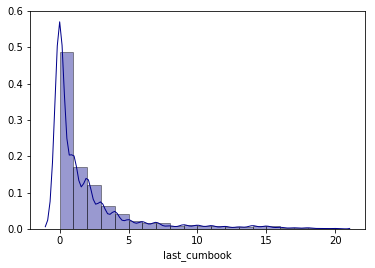

In [329]:
#The client's cumulative number of bookings

import seaborn as sns

# plt.hist(df['last_cumbook'],bins=10)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

sns.distplot(df['last_cumbook'], hist=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

# Analytic Questions
**Is there a specific staff who has more no-shows than others?**

book_staff
BECKY     21.296296
HOUSE      1.099537
JJ        37.789352
JOANNE    13.599537
KELLY     15.451389
SINEAD     9.953704
TANYA      0.810185
Name: book_staff, dtype: float64 book_staff
BECKY     30.357143
HOUSE      0.446429
JJ        30.803571
JOANNE    11.160714
KELLY     15.178571
SINEAD    10.714286
TANYA      1.339286
Name: book_staff, dtype: float64


Text(0.5, 1.0, 'the percentage of show and no-show customers for each staff')

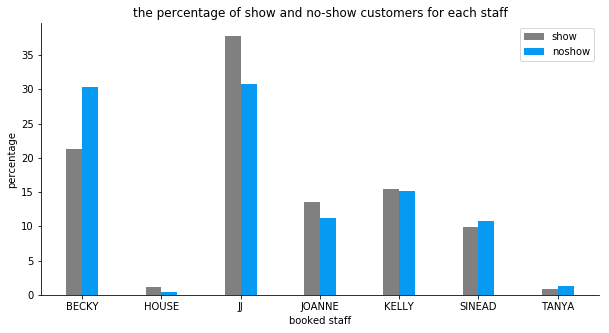

In [362]:
show_raw=df[df['noshow']==0].groupby(df['book_staff']).book_staff.count()
noshow_raw=df[df['noshow']==1].groupby(df['book_staff']).book_staff.count()

show=show_raw/show_raw.sum()*100
noshow=noshow_raw/noshow_raw.sum()*100

print(show, noshow)

N=7
ind=np.arange(N)
width=0.2

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(111)

ax.bar(ind, show, width, color='gray', label='show')
ax.bar(ind+width, noshow, width, color='xkcd:azure', label='noshow')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(ind+width/2)
ax.set_xticklabels(['BECKY','HOUSE','JJ','JOANNE','KELLY','SINEAD','TANYA'])
plt.ylabel('percentage')
plt.xlabel('booked staff')
plt.title('the percentage of show and no-show customers for each staff')

Text(0.5, 1.0, 'The percentage of no-shows for each staff')

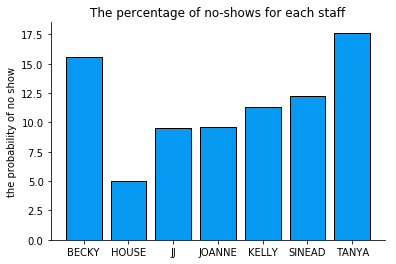

In [365]:
#no show percentage = no show / show+no show * 100

noshow_pct=noshow_raw/(show_raw+noshow_raw)*100
plt.bar(noshow_pct.index,noshow_pct,color='xkcd:azure', edgecolor='black')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('the probability of no show')
plt.title('The percentage of no-shows for each staff')

**What day do the customers don't show the most?**

Text(0.5, 0, 'booked staff')

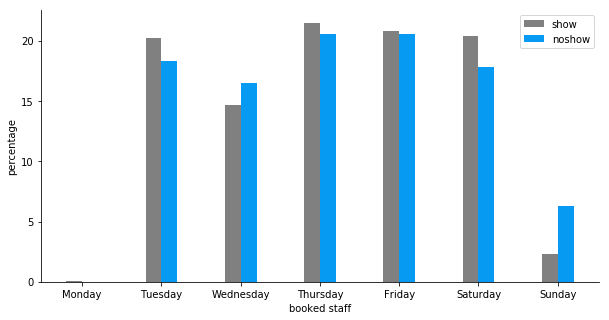

In [366]:
#bar and line graph

show_raw=df[df['noshow']==0].groupby(['book_dow']).book_dow.count()
noshow_raw=df[df['noshow']==1].groupby(['book_dow']).book_dow.count()

show=show_raw/sum(show_raw)*100
noshow=noshow_raw/sum(noshow_raw)*100

newidx=['Monday','Tuesday','Wednesday', 'Thursday','Friday',  'Saturday', 'Sunday']

show=show.reindex(newidx)
noshow=noshow.reindex(newidx)

N=7
ind=np.arange(N)
width=0.2

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(111)

ax.bar(ind, show, width, color='gray', label='show')
ax.bar(ind+width, noshow, width, color='xkcd:azure', label='noshow')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(ind+width/2)
ax.set_xticklabels(['Monday','Tuesday','Wednesday', 'Thursday','Friday',  'Saturday', 'Sunday'])
plt.ylabel('percentage')
plt.xlabel('booked staff')

# Becky can work only on Sunday

: Although Sunday takes the smallest amount of bookings, the percentage of no-shows are a lot more than that of shows on Sunday.

**When are the no show appointments during the day?**

Text(0.5, 1.0, 'no show')

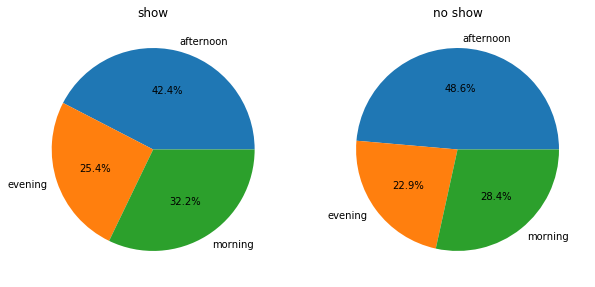

In [166]:
show_raw=df[df['noshow']==0].groupby(['book_tod']).book_tod.count()
noshow_raw=df[df['noshow']==1].groupby(['book_tod']).book_tod.count()

show=show_raw/sum(show_raw)*100
noshow=noshow_raw/sum(noshow_raw)*100

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(121)

ax.pie(show,labels=['afternoon','evening','morning'],autopct='%.1f%%')
plt.title('show')

ax2=fig.add_subplot(122)
ax2.pie(noshow,labels=['afternoon','evening','morning'],autopct='%.1f%%')
plt.title('no show')

: no show customers tend to not show up for the afternoon booking considering booking time of the entire customers.
#t-test needed

**How many times do the no show customers visit this hair salon before? ** 

last_cumbook
first    67.824074
1~5      25.000000
6~10      3.587963
11~15     2.719907
16~20     0.868056
Name: last_cumbook, dtype: float64 last_cumbook
first    48.660714
1~5      33.928571
6~10      7.589286
11~15     7.142857
16~20     2.678571
Name: last_cumbook, dtype: float64


Text(0.5, 0, 'booked staff')

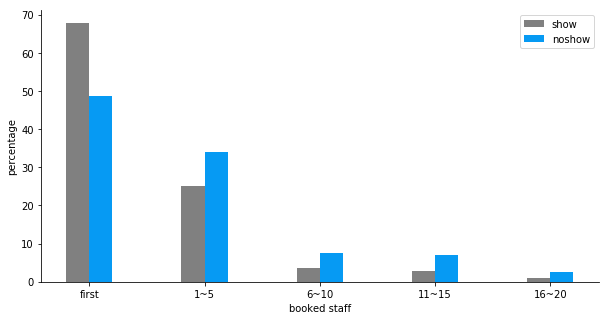

In [367]:
#provide percentage of the data
#categorize cumulative numbers of previous booking: first time, 1-5, 6-10, 11-15, 16-20
#whether they are regular customers or first visitor. How can we define the regular customers?

show_cat=pd.cut(df[df['noshow']==0].last_cumbook, bins=[0,1,6,10,15,21], labels=['first','1~5','6~10','11~15','16~20'],include_lowest=True)
noshow_cat=pd.cut(df[df['noshow']==1].last_cumbook, bins=[0,1,6,10,15,21], labels=['first','1~5','6~10','11~15','16~20'],include_lowest=True)

show=df[df['noshow']==0].groupby(show_cat).last_cumbook.count()
noshow=df[df['noshow']==1].groupby(noshow_cat).last_cumbook.count()

show=show/sum(show_raw)*100
noshow=noshow/sum(noshow_raw)*100

print(show,noshow)
N=5
ind=np.arange(N)
width=0.2

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(111)

ax.bar(ind, show, width, color='gray', label='show')
ax.bar(ind+width, noshow, width, color='xkcd:azure', label='noshow')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(ind+width/2)
ax.set_xticklabels(['first', '1~5', '6~10', '11~15', '16~20'])
plt.ylabel('percentage')
plt.xlabel('booked staff')


Ttest_indResult(statistic=-6.6668402263873165, pvalue=3.3919724431062694e-11)


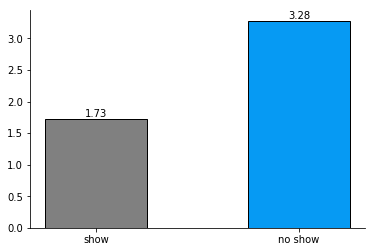

In [369]:
from scipy import stats

xaxis=['show','no show']
xvalues=[df[df['noshow']==0].last_cumbook.mean(),df[df['noshow']==1].last_cumbook.mean()]
bar=plt.bar(xaxis,xvalues,color=['gray','xkcd:azure'],edgecolor='black',width=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom')

    
print(stats.ttest_ind(df[df['noshow']==0].last_cumbook,df[df['noshow']==1].last_cumbook))

**Do the no show customers tend to not show up frequently? ** 

last_cumnoshow
0    1539
1      63
2      41
3      27
4      11
5      24
6       4
7      14
8       3
9       2
Name: last_cumnoshow, dtype: int64 last_cumnoshow
0    145
1     20
2     15
3     11
4      9
5      7
6      7
7      6
8      3
9      1
Name: last_cumnoshow, dtype: int64


/Users/yunjin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


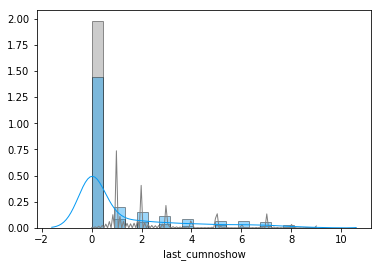

In [375]:
import seaborn as sns

show_raw=df[df['noshow']==0].groupby(['last_cumnoshow']).last_cumnoshow.count()
noshow_raw=df[df['noshow']==1].groupby(['last_cumnoshow']).last_cumnoshow.count()

print(show_raw,noshow_raw)


# plt.hist(df[df['noshow']==0].last_cumnoshow, color='gray')
# plt.hist(df[df['noshow']==1].last_cumnoshow, color='r')
# sns.distplot(df[df['noshow']==0].last_cumnoshow,bins=10)
#density plot

sns.distplot(df[df['noshow']==0].last_cumnoshow, hist=True, 
             bins=20, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
sns.distplot(df[df['noshow']==1].last_cumnoshow, hist=True, 
             bins=20, color = 'xkcd:azure', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

Ttest_indResult(statistic=-9.711976148551406, pvalue=8.287566101436737e-22)

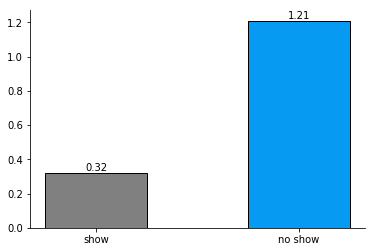

In [370]:
from scipy import stats

xaxis=['show','no show']
xvalues=[df[df['noshow']==0].last_cumnoshow.mean(),df[df['noshow']==1].last_cumnoshow.mean()]
bar=plt.bar(xaxis,xvalues,color=['gray','xkcd:azure'],edgecolor='black',width=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom')

stats.ttest_ind(df[df['noshow']==0].last_cumnoshow,df[df['noshow']==1].last_cumnoshow)

**Future study** 

1. What kind of feature would be the most important to classify no show clients?
2. When combining important features from the data, is the classifier able to reliably predict no show clients?